# Задача 3. Многоклассовая классификация и множественная классификация/регрессия

* **Дедлайн**: 11.12.2022, 23:59
* **Основной полный балл**: 5
* **Максимум баллов**: 10

## Задача

- [x] Изучите [возможности sklearn](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification) для решения задач **Multiclass classification**, **Multilabel classification** и **Multioutput Regression**. Основные компоненты библиотеки указаны на рисунке ниже.
![multi_org_chart](https://scikit-learn.org/stable/_images/multi_org_chart.png)

- [x] Найдите данные, на которых можно решить задачу **Multiclass classification** (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.
- [x] Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.
- [x] При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- [x] Используя стратегии **OneVsRest**, **OneVsOne** и **OutputCode** решите задачу **Multiclass classification** для каждого из пройденных базового алгоритма классификации (**logistic regression, svm, knn, naive bayes, decision tree**). При обучении использовать **подбор гиперпараметров**, **кросс-валидацию** и при необходимости **масштабирование данных**, добиться наилучшего качества предсказания.
- [x] Замерить время обучения каждой модели для каждой стратегии.
- [x] Для оценки качества моделей используйте метрику **AUC-ROC**.
- [x] Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.
- [ ] * (**+3 балла**) Повторить все пункты для задачи **Multilabel classification** (классификация с несколькими целевыми признаками, например, бинарными). В качестве стратегий попробовать **MultiOutputClassifier** и **ClassifierChain**.
- [ ] * (**+2 балла**) Повторить все пункты для задачи **Multioutput Regression** (регрессия с несколькими целевыми признаками, вещественными). Модель попробовать как минимум одну: **Ridge**. В качестве стратегий попробовать **MultiOutputRegressor** и **RegressorChain**. В качестве метрики использовать **R2**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

In [2]:
sns.set(font_scale=1.5)
sns.set(rc={'figure.figsize':(10, 8)})

# Multiclass classification

# Read Dataset

In [3]:
df = pd.read_csv('../data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


The columns in this [dataset](https://www.kaggle.com/datasets/uciml/iris) are:

- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

In [4]:
df = df.drop(columns=["Id"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<AxesSubplot: xlabel='Species', ylabel='count'>

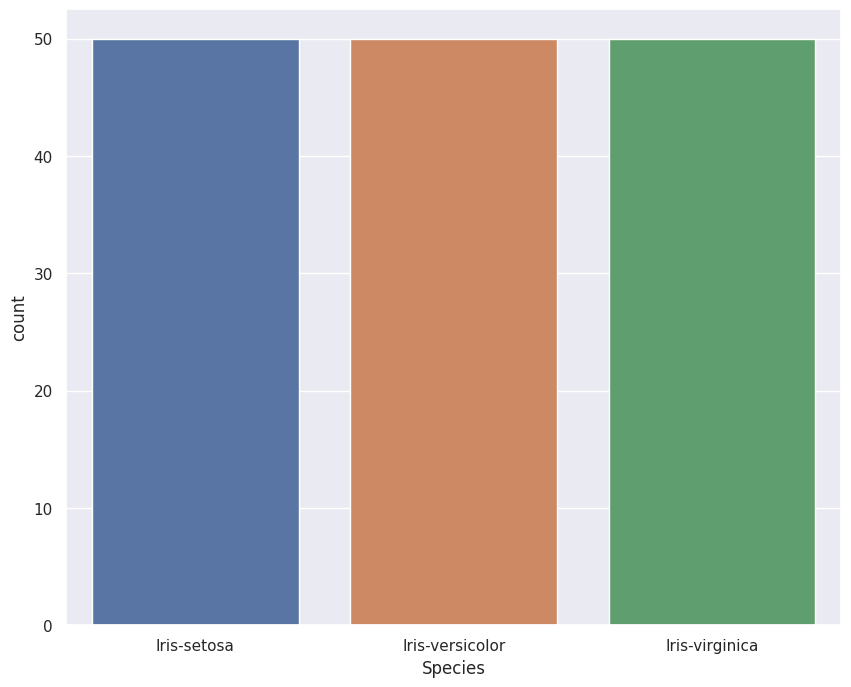

In [6]:
sns.countplot(data=df, x="Species")

Классы равной мощности

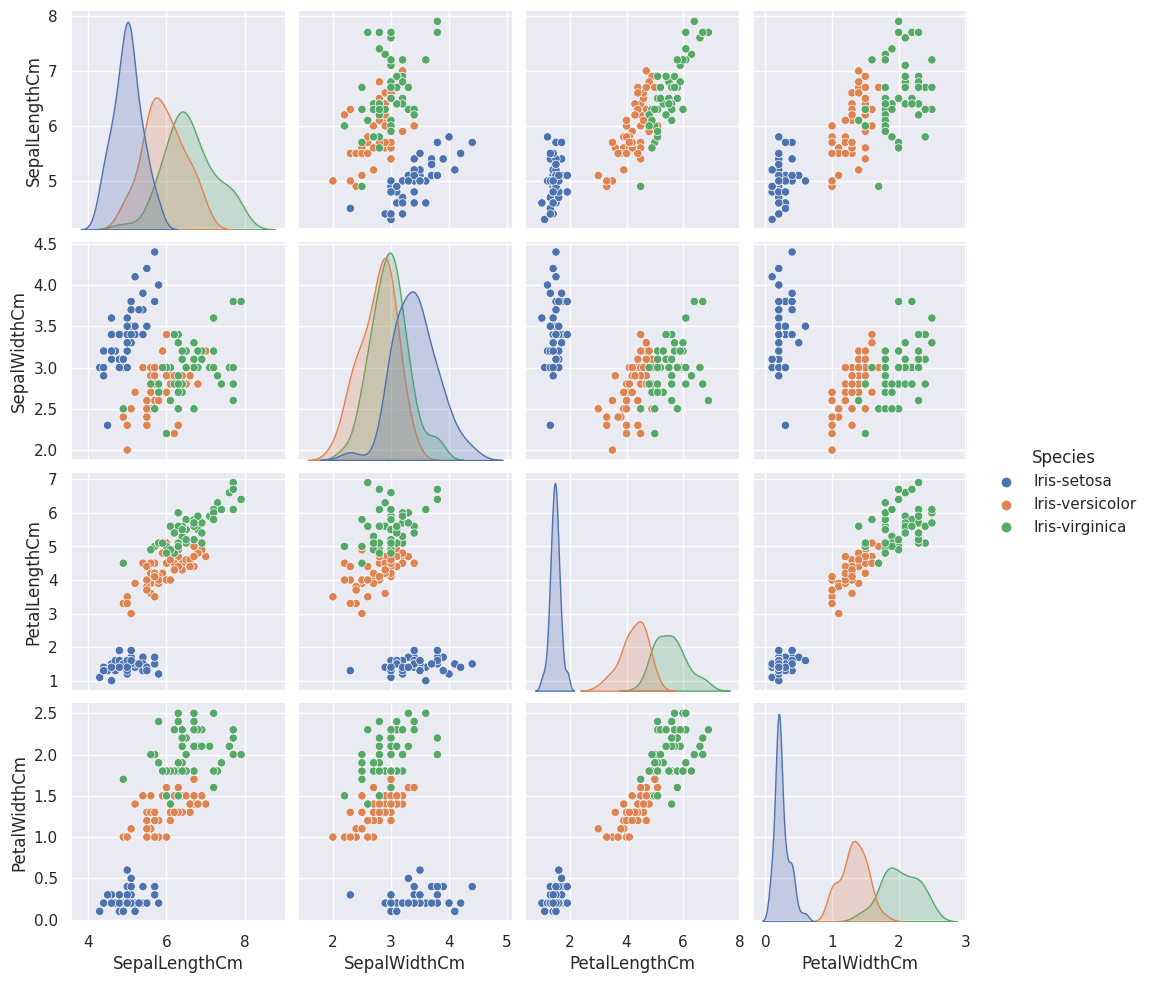

In [7]:
sns.pairplot(df, hue="Species")

Классы довольно хорошо разделяются признаками PetalWidthCm и PetalLengthCm

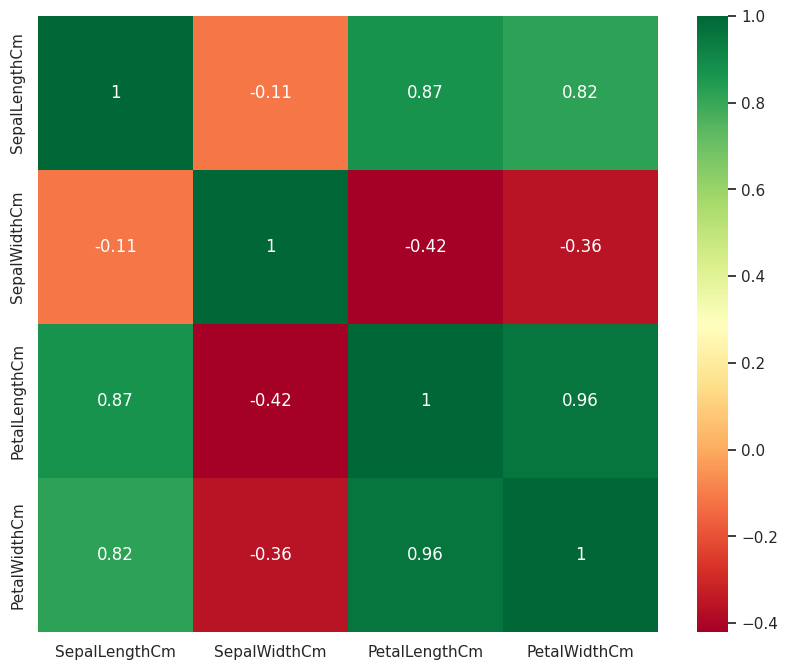

In [8]:
sns.heatmap(round(df.corr(), 2), annot=True, cmap='RdYlGn')
fig = plt.gcf()
plt.show()

Признаки довольно сильно коррелируют друг с другом

# Feature Engineering

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df["Species"].drop_duplicates()) 
df["Species"] = le.transform(df["Species"])

# Построение моделей

In [10]:
from sklearn.model_selection import train_test_split

y = df["Species"]
X = df.drop(columns=["Species"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Масштабируем признаки

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

## RFE

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

In [13]:
rfecv = RFECV(estimator=LogisticRegression())

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

rfecv.fit(X_train_scaled, y_train)
selected_features = list(X_train_scaled.columns[rfecv.support_])

In [14]:
X_train_scaled = X_train_scaled[selected_features]
X_test_scaled = X_test_scaled[selected_features]

In [15]:
from sklearn.multiclass import (
    OneVsRestClassifier,
    OneVsOneClassifier,
    OutputCodeClassifier,
)

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_validate

def fit_time(model, x, y):
    return cross_validate(model, x, y, cv=5)["fit_time"].mean()

accuracies = {}
fittime = {}

# LogisticRegression

### Подбор гиперпараметров

In [16]:
from sklearn.model_selection import GridSearchCV

Cs = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    LogisticRegression(),
    [{"C": Cs}],
    scoring="roc_auc_ovr",
    error_score="raise",
    cv=5,
)
searcher.fit(X_train_scaled, y_train)

best_C = searcher.best_params_["C"]

### OneVsRest

In [17]:
lr = LogisticRegression(C=best_C)
lr = OneVsRestClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["Logistic Regression (OneVsRest)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["Logistic Regression (OneVsRest)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 0.9555555555555556
Fit time: 0.006554985046386718


### OneVsOne

In [18]:
lr = LogisticRegression(C=best_C)
lr = OneVsOneClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["Logistic Regression (OneVsOne)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["Logistic Regression (OneVsOne)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 1.0
Fit time: 0.004691171646118164


### OutputCode

In [19]:
lr = LogisticRegression(C=best_C)
lr = OutputCodeClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["Logistic Regression (OutputCode)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["Logistic Regression (OutputCode)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 0.9555555555555556
Fit time: 0.005525922775268555


# SVM

### Подбор гиперпараметров

In [20]:
Cs = np.logspace(-5, 3, 20)
searcher = GridSearchCV(
    SVC(probability=True),
    [{"C": Cs}],
    scoring="roc_auc_ovr",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train_scaled, y_train)
best_C = searcher.best_params_["C"]

### OneVsRest

In [21]:
lr = SVC(C=best_C, probability=True)
lr = OneVsRestClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["SVM (OneVsRest)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["SVM (OneVsRest)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 1.0
Fit time: 0.004630470275878906


### OneVsOne

In [22]:
lr = SVC(C=best_C, probability=True)
lr = OneVsOneClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["SVM (OneVsOne)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["SVM (OneVsOne)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 1.0
Fit time: 0.002841615676879883


### OutputCode

In [23]:
lr = SVC(C=best_C, probability=True)
lr = OutputCodeClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["SVM (OutputCode)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["SVM (OutputCode)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 1.0
Fit time: 0.004285049438476562


# KNN

### Подбор гиперпараметров

In [24]:
n_neighbors = [1, 2, 3, 4]
searcher = GridSearchCV(
    KNeighborsClassifier(),
    [{"n_neighbors": n_neighbors}],
    scoring="roc_auc_ovr",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train_scaled, y_train)

best_n_neighbors = searcher.best_params_["n_neighbors"]

### OneVsRest

In [25]:
lr = KNeighborsClassifier(n_neighbors=best_n_neighbors)
lr = OneVsRestClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["KNN (OneVsRest)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["KNN (OneVsRest)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 0.9777777777777777
Fit time: 0.003223609924316406


### OneVsOne

In [26]:
lr = KNeighborsClassifier(n_neighbors=best_n_neighbors)
lr = OneVsOneClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["KNN (OneVsOne)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["KNN (OneVsOne)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 0.9777777777777777
Fit time: 0.0017605304718017578


### OutputCode

In [27]:
lr = KNeighborsClassifier(n_neighbors=best_n_neighbors)
lr = OutputCodeClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["KNN (OutputCode)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["KNN (OutputCode)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 0.9555555555555556
Fit time: 0.0029712200164794924


# Naive Bayes

### Подбор гиперпараметров

In [28]:
searcher = GridSearchCV(
    GaussianNB(),
    [{"var_smoothing": np.logspace(0, -6, num=50)}],
    scoring="roc_auc_ovr",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train_scaled, y_train)
best_var_smoothing = searcher.best_params_["var_smoothing"]

### OneVsRest

In [29]:
lr = GaussianNB(var_smoothing=best_var_smoothing)
lr = OneVsRestClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["NB (OneVsRest)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["NB (OneVsRest)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 0.9333333333333333
Fit time: 0.00341033935546875


### OneVsOne

In [30]:
lr = GaussianNB(var_smoothing=best_var_smoothing)
lr = OneVsOneClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["NB (OneVsOne)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["NB (OneVsOne)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 0.9777777777777777
Fit time: 0.001829051971435547


### OutputCode

In [31]:
lr = GaussianNB(var_smoothing=best_var_smoothing)
lr = OutputCodeClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["NB (OutputCode)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["NB (OutputCode)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 0.8888888888888888
Fit time: 0.003021097183227539


# Decision Tree

### Подбор гиперпараметров

In [32]:
depths = np.arange(4, 8)
min_samples_splits = [2, 3, 4]
min_samples_leafs = [1, 3, 4]

searcher = GridSearchCV(
    DecisionTreeClassifier(),
    [
        {
            "max_depth": depths,
            "min_samples_split": min_samples_splits,
            "min_samples_leaf": min_samples_leafs,
        }
    ],
    scoring="roc_auc_ovr",
    cv=5,
    error_score="raise",
)
searcher.fit(X_train_scaled, y_train)

best_max_depth = searcher.best_params_["max_depth"]
best_min_samples_split = searcher.best_params_["min_samples_split"]
best_min_samples_leaf = searcher.best_params_["min_samples_leaf"]

### OneVsRest

In [33]:
lr = DecisionTreeClassifier(max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,
                            min_samples_leaf=best_min_samples_leaf)
lr = OneVsRestClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["DecisionTree (OneVsRest)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["DecisionTree (OneVsRest)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 1.0
Fit time: 0.0032016754150390623


### OneVsOne

In [34]:
lr = DecisionTreeClassifier(max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,
                            min_samples_leaf=best_min_samples_leaf)
lr = OneVsOneClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["DecisionTree (OneVsOne)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["DecisionTree (OneVsOne)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 1.0
Fit time: 0.0023668289184570314


### OutputCode

In [35]:
lr = DecisionTreeClassifier(max_depth=best_max_depth, 
                            min_samples_split=best_min_samples_split,
                            min_samples_leaf=best_min_samples_leaf)
lr = OutputCodeClassifier(lr).fit(X_train_scaled, y_train)
acc = accuracy_score(y_test, lr.predict(X_test_scaled))
accuracies["DecisionTree (OutputCode)"] = acc
t = fit_time(lr, X_train_scaled, y_train)
fittime["DecisionTree (OutputCode)"] = t
print(f"Accuracy: {acc}")
print(f"Fit time: {t}")

Accuracy: 0.7111111111111111
Fit time: 0.0030065059661865236


# Сравнение методов

In [53]:
time_df = pd.DataFrame.from_dict({key: [value] for key, value in fittime.items()})
acc_df = pd.DataFrame.from_dict({key: [value] for key, value in accuracies.items()})

<AxesSubplot: xlabel='Accuracy', ylabel='Method'>

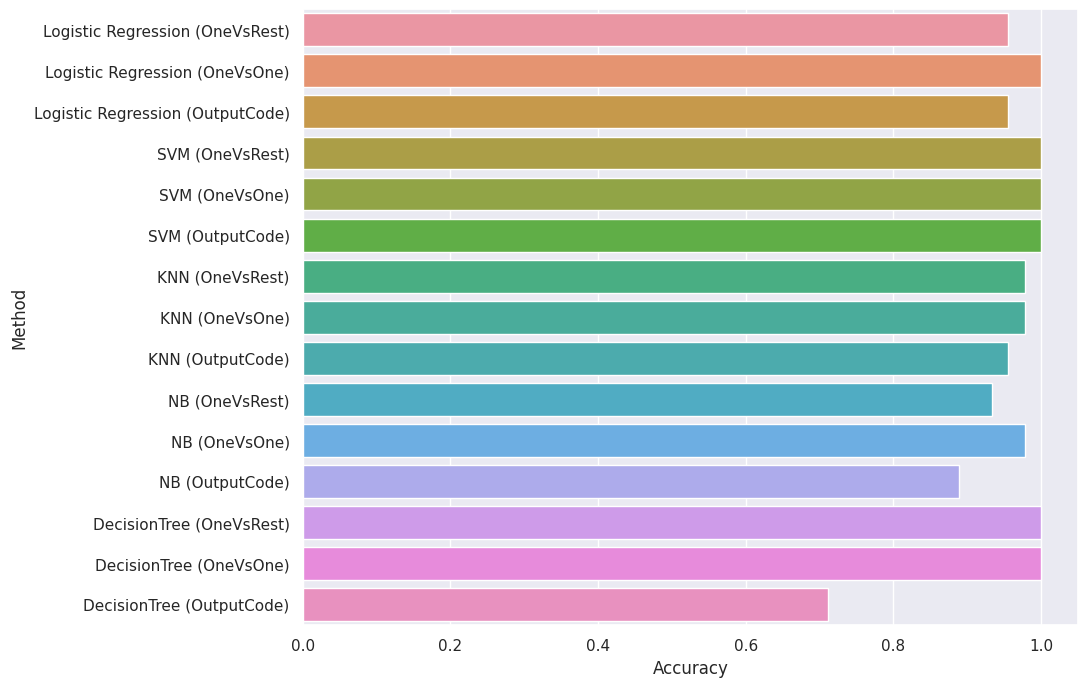

In [88]:
plt.ylabel("Method")
plt.xlabel("Accuracy")
sns.barplot(x=acc_df.values[0], y=acc_df.columns)

<AxesSubplot: xlabel='Time', ylabel='Method'>

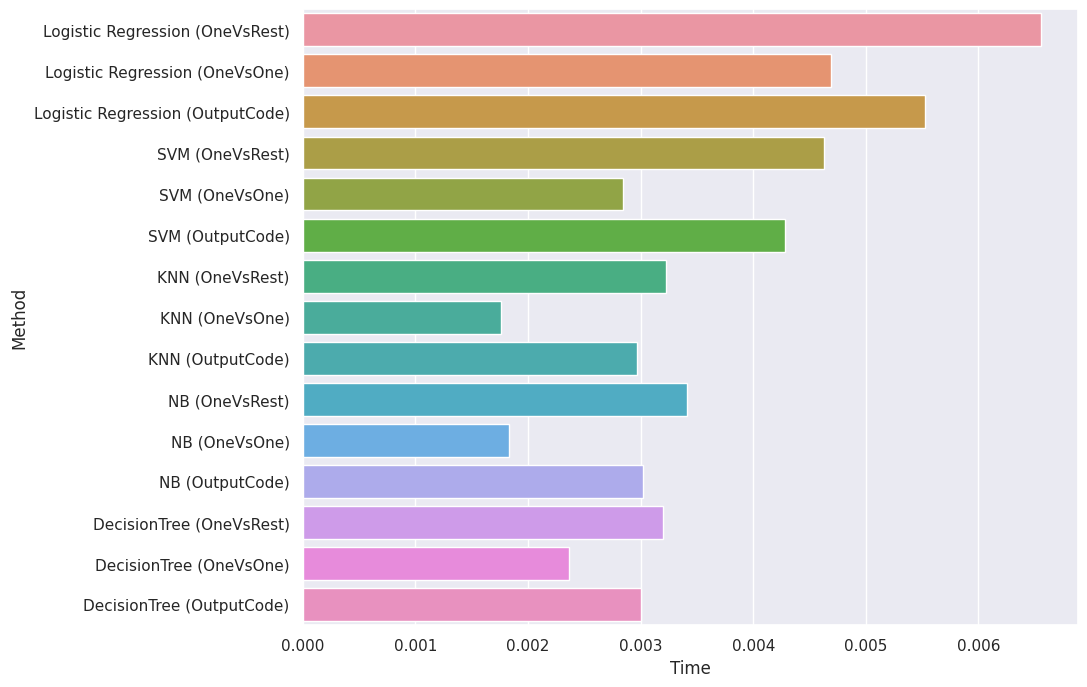

In [70]:
plt.ylabel("Method")
plt.xlabel("Time")
sns.barplot(x=time_df.values[0], y=time_df.columns)

# Вывод

### Точность

Наименьшую точность во всех методах показала стратегия OutputCode

Стабильно лучший результат в плане Accuracy у OneVsOne

Из моделей хуже всего в плане точности справился байесовский классификатор

### Время

Быстрее всего справляется OneVsOne.

Сравнивая модели, дольше всех работает логрег

# Multilabel Classification

...